In [3]:
!pip install graphviz
!pip install pm4py


  Obtaining dependency information for pm4py from https://files.pythonhosted.org/packages/c9/bf/a53b8c74a48faaf7fef85e677e29ef9c3e3e5b05b616e6d8d40461d46661/pm4py-2.7.13-py3-none-any.whl.metadata
  Obtaining dependency information for deprecation from https://files.pythonhosted.org/packages/02/c3/253a89ee03fc9b9682f1541728eb66db7db22148cd94f89ab22528cd1e1b/deprecation-2.1.0-py2.py3-none-any.whl.metadata
  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
Using cached pm4py-2.7.13-py3-none-any.whl (2.0 MB)
Using cached cvxopt-1.3.2-cp311-cp311-win_amd64.whl (12.8 MB)
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none

In [5]:
!pip install transformers

parsing log, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Is the Petri Net a Workflow Net? True
Is the Petri Net sound? (True, {'s_c_net': places: [ end, start ]
transitions: [ (BrushTeeth, 'BrushTeeth'), (GetDressed, 'GetDressed'), (PrepareDinner, 'PrepareDinner'), (Relax, 'Relax'), (short_circuited_transition, 'short_circuited_transition') ]
arcs: [ (BrushTeeth, 'BrushTeeth')->end, (GetDressed, 'GetDressed')->end, (PrepareDinner, 'PrepareDinner')->end, (Relax, 'Relax')->end, (short_circuited_transition, 'short_circuited_transition')->start, end->(short_circuited_transition, 'short_circuited_transition'), start->(BrushTeeth, 'BrushTeeth'), start->(GetDressed, 'GetDressed'), start->(PrepareDinner, 'PrepareDinner'), start->(Relax, 'Relax') ], 'place_invariants': array([[[1.],
        [1.]]]), 'uniform_place_invariants': [array([[1.],
       [1.]])], 's_components': [{end, (GetDressed, 'GetDressed'), (BrushTeeth, 'BrushTeeth'), (PrepareDinner, 'PrepareDinner'), (Relax, 'Relax'), (short_circuited_transition, 'short_circuited_transition'), start}

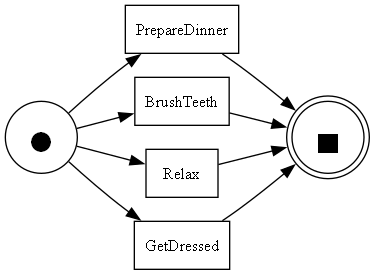

aligning log, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

Fitness {'percFitTraces': 0.0, 'averageFitness': 0.07138463371052878, 'percentage_of_fitting_traces': 0.0, 'average_trace_fitness': 0.07138463371052878, 'log_fitness': 0.02298850574712641}


computing precision with alignments, completed variants ::   0%|          | 0/736 [00:00<?, ?it/s]

Precision 1.0


replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Generalization 0.9269066175710472
Semplicity 0.6000000000000001


In [2]:
import pm4py
from pm4py.analysis import check_is_workflow_net

# Load .xes dataset
log = pm4py.read_xes('kasternC_filtered.xes')

# Extract the Petri Net from logs (Alpha Miner Method)
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

# Verify if the Petri Net is a Workflow Net
is_workflow_net = check_is_workflow_net(net)
print(f"Is the Petri Net a Workflow Net? {is_workflow_net}")

# Verify if the Petri Net is sound
is_sound =pm4py.analysis.check_soundness(net,initial_marking, final_marking)
print(f"Is the Petri Net sound? {is_sound}")

# Visualize Petri Net
from pm4py.visualization.petri_net import visualizer as pn_vis_factory
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

# Fitness metric
fitness = pm4py.conformance.fitness_alignments(log, net, initial_marking, final_marking )
print("Fitness", fitness)

# Precision metric
precision = pm4py.conformance.precision_alignments(log, net, initial_marking, final_marking )
print("Precision", precision)

# Generalizatioln metric
generalization = pm4py.algo.evaluation.generalization.algorithm.apply(log, net, initial_marking, final_marking)
print("Generalization", generalization)

# SImplicity metric
simplicity = pm4py.algo.evaluation.simplicity.algorithm.apply (net)
print("Semplicity",simplicity)


parsing log, completed traces ::   0%|          | 0/21 [00:00<?, ?it/s]

Is the Petri Net a Workflow Net? False
Is the Petri Net sound? (False, {'s_c_net': places: [ end, start ]
transitions: [ (BrushTeeth, 'BrushTeeth'), (Eating, 'Eating'), (GetDressed, 'GetDressed'), (GetDrink, 'GetDrink'), (GetSnack, 'GetSnack'), (GoToBed, 'GoToBed'), (LeaveHouse, 'LeaveHouse'), (None, 'None'), (PrepareBreakfast, 'PrepareBreakfast'), (PrepareDinner, 'PrepareDinner'), (PrepareLunch, 'PrepareLunch'), (PutClothesInWashingmachine, 'PutClothesInWashingmachine'), (Relax, 'Relax'), (Shave, 'Shave'), (TakeMedication, 'TakeMedication'), (TakeShower, 'TakeShower'), (UseToiletDownstairs, 'UseToiletDownstairs'), (UseToiletUpstairs, 'UseToiletUpstairs'), (short_circuited_transition, 'short_circuited_transition') ]
arcs: [ (GetDressed, 'GetDressed')->end, (None, 'None')->end, (PrepareDinner, 'PrepareDinner')->end, (Relax, 'Relax')->end, (Shave, 'Shave')->end, (UseToiletDownstairs, 'UseToiletDownstairs')->end, (UseToiletUpstairs, 'UseToiletUpstairs')->end, (short_circuited_transition, 

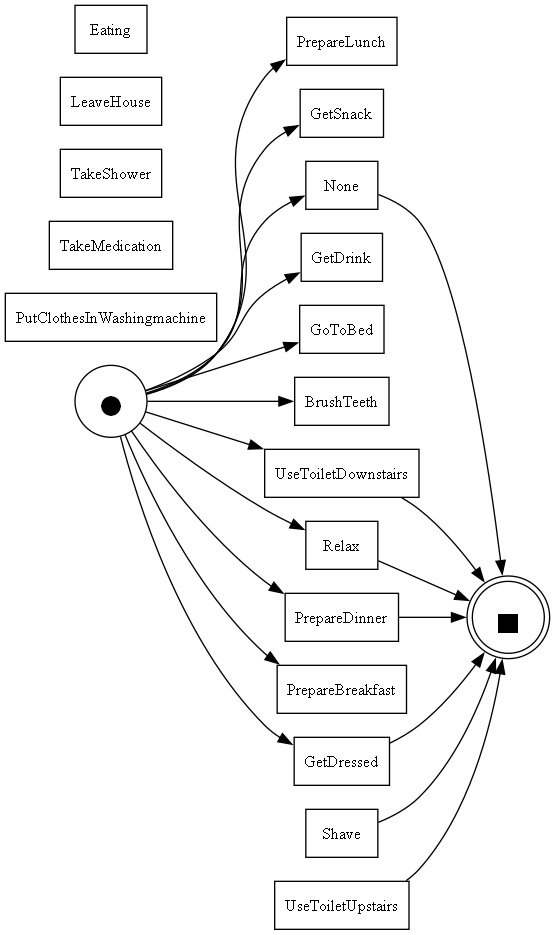

In [58]:
import pm4py

# Load the .xes log file
log = pm4py.read_xes('XES Event Log.xes')

# Extract the Petri Net from the logs
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

is_workflow_net = check_is_workflow_net(net)
print(f"Is the Petri Net a Workflow Net? {is_workflow_net}")

soundness = pm4py.analysis.check_soundness(net, initial_marking, final_marking)
print(f"Is the Petri Net sound? {soundness}")
                                                                     
from pm4py.visualization.petri_net import visualizer as pn_vis_factory
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)

# Display the Petri Net (save to a file or visualize directly)
pn_vis_factory.view(gviz)  # Visualize directly


parsing log, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Is the Petri Net a Workflow Net? True


C:\Users\Utente\anaconda3\Lib\site-packages\pm4py\algo\analysis\woflan\place_invariants\utility.py:158: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


Is the Petri Net sound? (True, {'s_c_net': places: [ p_10, p_11, p_12, p_13, p_15, p_16, p_17, p_18, p_20, p_21, p_22, p_23, p_5, p_6, p_7, p_8, sink, source ]
transitions: [ (599d7f04-36a5-45e4-a934-f19b80fa06b1, 'BrushTeeth'), (8a7fd50b-607a-4787-8358-41eb5990d1a0, 'PrepareDinner'), (911eea0d-ec00-46e2-9490-eaf78da199c2, 'Relax'), (e2b238de-0255-4ac2-9c4b-31c7e3b133b7, 'GetDressed'), (init_loop_11, None), (init_loop_16, None), (init_loop_21, None), (init_loop_6, None), (short_circuited_transition, 'short_circuited_transition'), (skip_10, None), (skip_13, None), (skip_14, None), (skip_15, None), (skip_18, None), (skip_19, None), (skip_20, None), (skip_23, None), (skip_24, None), (skip_5, None), (skip_8, None), (skip_9, None), (tauJoin_4, None), (tau_1, None) ]
arcs: [ (599d7f04-36a5-45e4-a934-f19b80fa06b1, 'BrushTeeth')->p_8, (8a7fd50b-607a-4787-8358-41eb5990d1a0, 'PrepareDinner')->p_18, (911eea0d-ec00-46e2-9490-eaf78da199c2, 'Relax')->p_23, (e2b238de-0255-4ac2-9c4b-31c7e3b133b7, 'Get

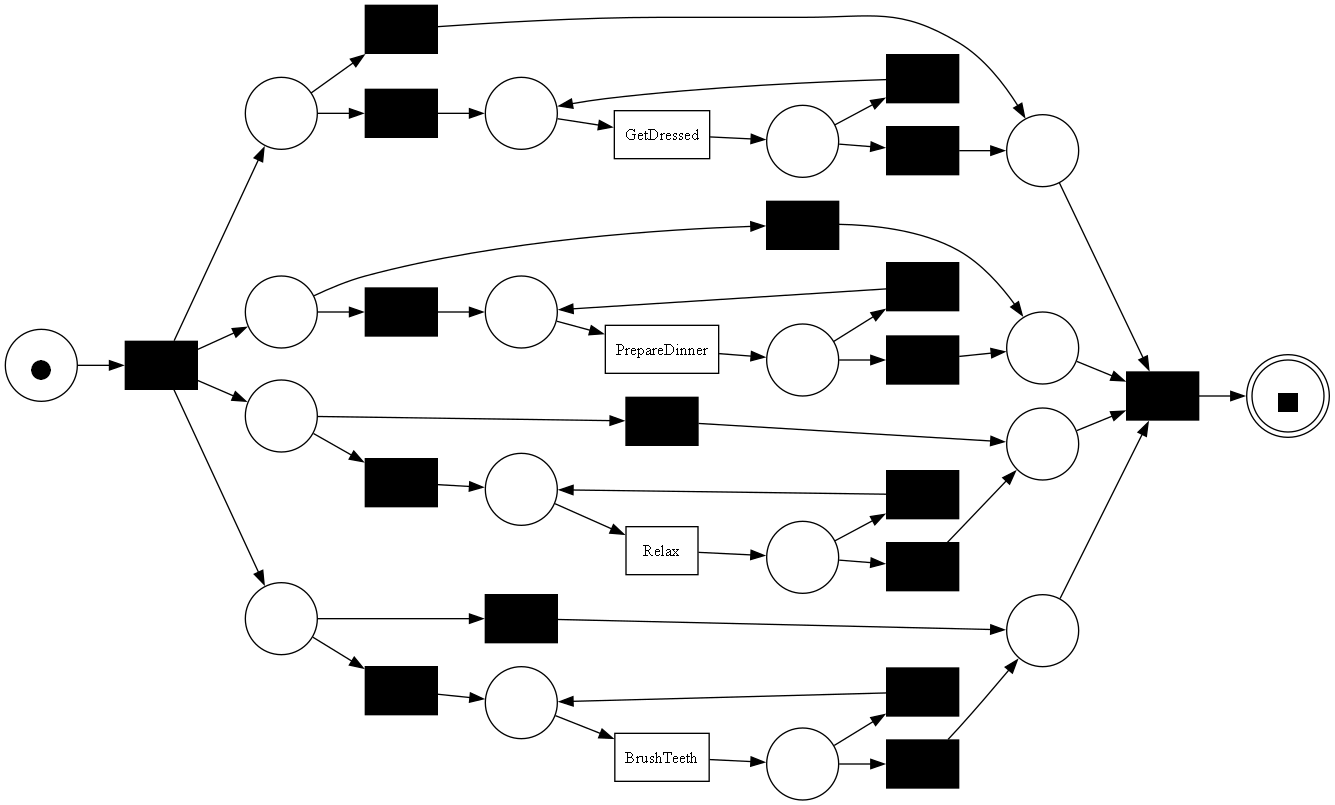

aligning log, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

Fitness {'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.9998930240021581}


computing precision with alignments, completed variants ::   0%|          | 0/736 [00:00<?, ?it/s]

Precision 0.2625968992248062


replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Generalization 0.689417450627172
Semplicity 0.6666666666666666


In [3]:
import pm4py

# Load .xes dataset
log = pm4py.read_xes('kasternC_filtered.xes')

# # Extract the Petri Net from logs- Inductive Miner
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

is_workflow_net = check_is_workflow_net(net)
print(f"Is the Petri Net a Workflow Net? {is_workflow_net}")

soundness =pm4py.analysis.check_soundness(net,initial_marking, final_marking)
print(f"Is the Petri Net sound? {soundness}")

# Visualize Petri Net
pm4py.view_petri_net(net, initial_marking, final_marking)

fitness = pm4py.conformance.fitness_alignments(log, net, initial_marking, final_marking )
print("Fitness", fitness)

precision = pm4py.conformance.precision_alignments(log, net, initial_marking, final_marking )
print("Precision", precision)

generalization = pm4py.algo.evaluation.generalization.algorithm.apply(log, net, initial_marking, final_marking)
print("Generalization", generalization)

simplicity = pm4py.algo.evaluation.simplicity.algorithm.apply (net)
print("Semplicity",simplicity)

parsing log, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Is the Petri Net a Workflow Net? True
Is the Petri Net sound? (True, {'s_c_net': places: [ intplace_BrushTeeth, intplace_GetDressed, intplace_PrepareDinner, intplace_Relax, pre_BrushTeeth, pre_GetDressed, pre_PrepareDinner, pre_Relax, sink0, source0 ]
transitions: [ (BrushTeeth, 'BrushTeeth'), (GetDressed, 'GetDressed'), (PrepareDinner, 'PrepareDinner'), (Relax, 'Relax'), (hid_12, None), (hid_13, None), (hid_14, None), (hid_15, None), (hid_16, None), (hid_17, None), (hid_18, None), (hid_19, None), (hid_20, None), (hid_21, None), (hid_22, None), (hid_23, None), (hid_24, None), (hid_3, None), (hid_6, None), (hid_9, None), (short_circuited_transition, 'short_circuited_transition') ]
arcs: [ (BrushTeeth, 'BrushTeeth')->intplace_BrushTeeth, (GetDressed, 'GetDressed')->intplace_GetDressed, (PrepareDinner, 'PrepareDinner')->intplace_PrepareDinner, (Relax, 'Relax')->intplace_Relax, (hid_12, None)->pre_Relax, (hid_13, None)->pre_BrushTeeth, (hid_14, None)->pre_GetDressed, (hid_15, None)->sink0,

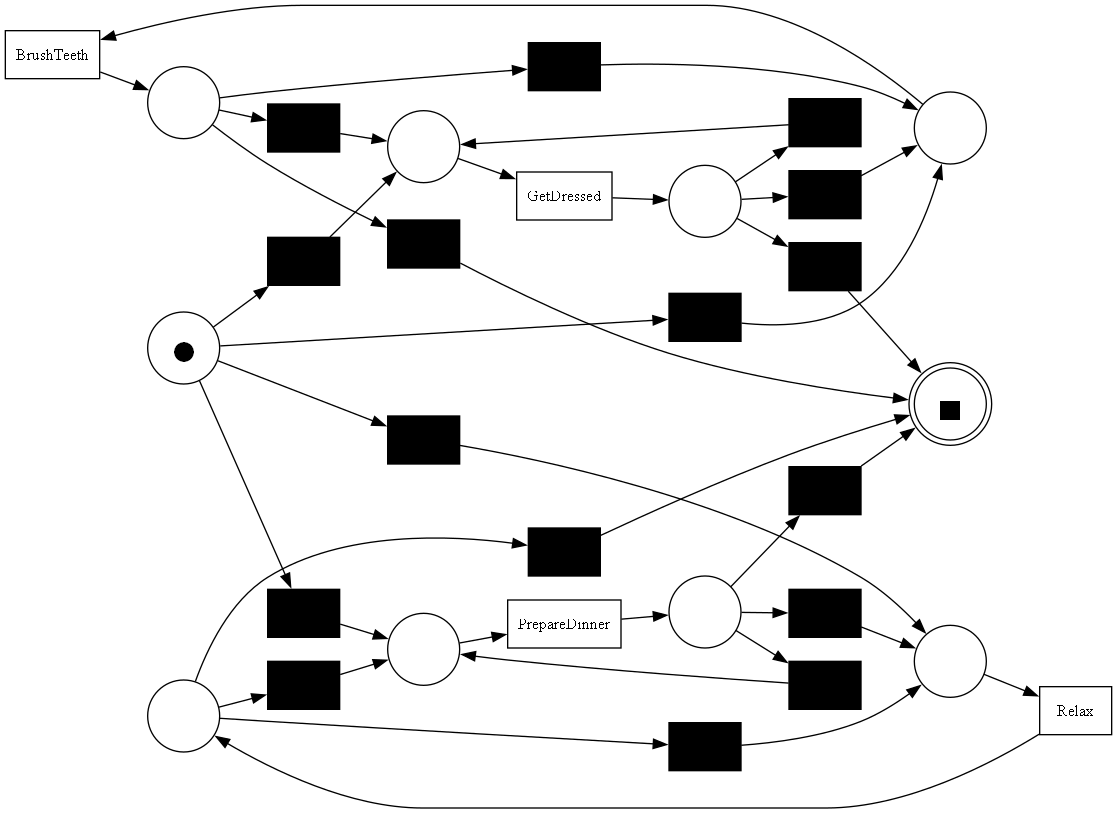

aligning log, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

Fitness {'percFitTraces': 55.55555555555556, 'averageFitness': 0.9612223941848205, 'percentage_of_fitting_traces': 55.55555555555556, 'average_trace_fitness': 0.9612223941848205, 'log_fitness': 0.9245564952724247}


computing precision with alignments, completed variants ::   0%|          | 0/736 [00:00<?, ?it/s]

Precision 0.5269151138716356


replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

Generalization 0.6306322929711725
Semplicity 0.6000000000000001


In [4]:
import pm4py

# Load .xes dataset
log = pm4py.read_xes('kasternC_filtered.xes')
# Extract the Petri Net from logs
net, initial_marking, final_marking = pm4py.discovery.discover_petri_net_heuristics(log)

is_workflow_net = check_is_workflow_net(net)
print(f"Is the Petri Net a Workflow Net? {is_workflow_net}")

soundness =pm4py.analysis.check_soundness(net,initial_marking, final_marking)
print(f"Is the Petri Net sound? {soundness}")


# Visualize Petri Net
pm4py.view_petri_net(net, initial_marking, final_marking)


fitness = pm4py.conformance.fitness_alignments(log, net, initial_marking, final_marking )
print("Fitness", fitness)

precision = pm4py.conformance.precision_alignments(log, net, initial_marking, final_marking )
print("Precision", precision)

generalization = pm4py.algo.evaluation.generalization.algorithm.apply(log, net, initial_marking, final_marking)
print("Generalization", generalization)

simplicity = pm4py.algo.evaluation.simplicity.algorithm.apply (net)
print("Semplicity",simplicity)

In [5]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Choose your model (FLAN-T5 or BLOOM)
model_name = "google/flan-t5-large"  # or "bigscience/bloom-1b7" for BLOOM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""

petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""


# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following questions:

1. Are there any discrepancies or missing transitions between the states? If so, describe them in detail.
"""

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=712)

# Generate the response
outputs = model.generate(inputs["input_ids"], max_length=750, num_beams=5, early_stopping=True)

# Decode and print the response
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Petri Net Analysis:")
print(response)


C:\Users\Utente\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Petri Net Analysis:
1. Yes


In [6]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Choose your model (FLAN-T5 or BLOOM)
model_name = "google/flan-t5-large"  # or "bigscience/bloom-1b7" for BLOOM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following questions:

2. How would you improve the fitness score of the Petri net based on the provided logs? 
"""

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=712)

# Generate the response
outputs = model.generate(inputs["input_ids"], max_length=750, num_beams=5, early_stopping=True)

# Decode and print the response
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Petri Net Analysis:")
print(response)


Petri Net Analysis:
0.926 - Simplicity: 0.61


In [42]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Choose your model (FLAN-T5 or BLOOM)
model_name = "google/flan-t5-large"  # or "bigscience/bloom-1b7" for BLOOM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following questions:

3. What could be the impact of the model's high precision (1.0) on the generalization? Do you think the model is overfitting, and if so, how can it be adjusted to improve generalization?
"""

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=712)

# Generate the response
outputs = model.generate(inputs["input_ids"], max_length=750, num_beams=5, early_stopping=True)

# Decode and print the response
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Petri Net Analysis:")
print(response)


Petri Net Analysis:
Generalization: 0.926 - Simplicity: 0.61


In [41]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Choose your model (FLAN-T5 or BLOOM)
model_name = "google/flan-t5-large"  # or "bigscience/bloom-1b7" for BLOOM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following questions:

4. Based on the given logs and Petri net, are there any additional transitions or states that should be added to better reflect the behavior captured in the logs?
"""

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=712)

# Generate the response
outputs = model.generate(inputs["input_ids"], max_length=750, num_beams=5, early_stopping=True)

# Decode and print the response
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Petri Net Analysis:")
print(response)


Petri Net Analysis:
No


In [39]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
torch.cuda.empty_cache()
# BLOOM
model_name = "bigscience/bloom-1b7"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following question:

1. Are there any discrepancies or missing transitions between the states? If so, describe them in detail.
"""

inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(inputs["input_ids"], max_length=450, temperature=0.7, top_k=50)

response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("results:")
print(response)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


results:

You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:

I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" va

In [57]:
from transformers import AutoModelForCausalLM, AutoTokenizer
torch.cuda.empty_cache()
# Carica il modello BLOOM
model_name = "bigscience/bloom-1b7"  # Puoi scegliere una versione più grande, come "bloom-7b1", se hai risorse sufficienti
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following question:

2. How would you improve the fitness score of the Petri net based on the provided logs? 
"""

# Tokenizza e genera la risposta
inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(inputs["input_ids"], max_length=650, temperature=0.7, top_k=50)

# Decodifica la risposta
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("results:")
print(response)
torch.cuda.empty_cache()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


results:

You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:

I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" va

In [56]:
from transformers import AutoModelForCausalLM, AutoTokenizer
torch.cuda.empty_cache()
# Carica il modello BLOOM
model_name = "bigscience/bloom-1b7"  # Puoi scegliere una versione più grande, come "bloom-7b1", se hai risorse sufficienti
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Based on this information, answer the following question:

3. What could be the impact of the model's high precision (1.0) on the generalization? Do you think the model is overfitting, and if so, how can it be adjusted to improve generalization?
"""

# Tokenizza e genera la risposta
inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(inputs["input_ids"], max_length=750, temperature=0.7, top_k=50)

# Decodifica la risposta
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("results:")
print(response)
torch.cuda.empty_cache()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


results:

You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:

I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" va

In [50]:
torch.cuda.empty_cache()


In [55]:
from transformers import AutoModelForCausalLM, AutoTokenizer
torch.cuda.empty_cache()
# Carica il modello BLOOM
model_name = "bigscience/bloom-1b7"  # Puoi scegliere una versione più grande, come "bloom-7b1", se hai risorse sufficienti
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
# Define the Petri net description and metrics (you can replace this with your actual data)
log_description = """
I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-12-03T00:11:13.000+01:00"/>
		</event>
"""
petri_net_description = """
The Petri net represents the following transitions and states:
- States: start, end
- Transitions: 
  - Start -> BrushTeeth ->end
  - start -> GetDressed -> end
  - start -> Relax -> end
  - start -> PrepareDinner -> end

Metrics:
- Fitness: 0.071
- Precision: 1
- Generalization: 0.926
- Simplicity: 0.61
"""

# Define the analysis prompt based on your Petri net and logs
prompt = f"""
You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:
{log_description}

Petri Net Model:
{petri_net_description}

Answer:
4. Based on the given logs and Petri net, are there any additional transitions or states that should be added to better reflect the behavior captured in the logs?
"""

# Tokenizza e genera la risposta
inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(inputs["input_ids"], max_length=850, temperature=0.7, top_k=50)

# Decodifica la risposta
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("results:")
print(response)
torch.cuda.empty_cache()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


results:

You are provided with a set of sensor logs and a Petri net model with the following transitions and metrics:

Logs:

I have sensor logs that describe a person's movements and actions. The logs include timestamps, states, and transitions:
Logs:
<string key="concept:name" value="Bathtub"/>
		<event>
			<string key="concept:instance" value="229"/>
			<string key="concept:name" value="BrushTeeth"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T01:34:00.000+01:00"/>
		</event>
        <event>
			<string key="concept:instance" value="233"/>
			<string key="concept:name" value="GetDressed"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" value="2008-11-20T09:34:45.000+01:00"/>
		</event>
        	<event>
			<string key="concept:instance" value="1536"/>
			<string key="concept:name" value="Relax"/>
			<string key="lifecycle:transition" value="complete"/>
			<date key="time:timestamp" va